In [1]:
pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import scipy.stats as stats
import scipy.stats as st
import pingouin as pg
from mlxtend.frequent_patterns import apriori, association_rules



C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Problèmatique métier:

Une entreprise souhaite comprendre les interactions entre ses produits, ses performances régionales et ses marges pour optimiser sa stratégie commerciale.

# Importation et vérification des données  

### Importation et lecture du fichier.

 Nous avons rencontrer un soucis lors de l'importation du fichier au niveau de l'encodage des données.
Essayer avec l'encodage ISO-8859-1 (latin1).


In [4]:
# Importation et correction de l'encodage
df = pd.read_csv("Sample.csv", encoding='latin1')
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


### Vérification des données.

In [5]:
# Dimension des données
df.shape

(9994, 21)

In [6]:
# Information sur les données.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
# Recherche des valeurs manquantes
print("Le nombre de valeurs manquantes dans les différentes colonnes est:",df.isnull().sum())

Le nombre de valeurs manquantes dans les différentes colonnes est: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


Nos données ne contiennent pas de valeurs manquantes

In [8]:
# Recherche des doublons.
df.duplicated(keep=False).sum()

0

Nos données ne contiennent pas de doublons.

In [9]:
# Vérification des prix
print(f"le prix de vente minimale est: {df['Sales'].min()}", f"le prix de vente maximale est: {df['Sales'].max()}")

le prix de vente minimale est: 0.444 le prix de vente maximale est: 22638.48


In [10]:
# Les pays de vente
df['Country'].unique()

array(['United States'], dtype=object)

In [11]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [12]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

# Nettoyage des données

# Analyse des tendance du Chiffre d'affaire.

## Calcul du chiffre d'affaire total

In [14]:
# Calcul du chiffre d'affaire total
Chiff_aff_total = round(df['Sales'].sum(),2)
print("Chiffre d'affaire total :", Chiff_aff_total, "€")

Chiffre d'affaire total : 2297200.86 €


## Chiffre d'affaire dans le temps

In [15]:
Chiff_aff_temp = df.groupby(by=['Order Date']).sum().reset_index()
Chiff_aff_temp['date'] = pd.to_datetime (Chiff_aff_temp['Order Date'])
Chiff_aff_temp = Chiff_aff_temp.rename(columns={'Sales':'Chiff_aff'})
Chiff_aff_temp['Chiff_aff'] = round(Chiff_aff_temp['Chiff_aff'])
Chiff_aff_temp= Chiff_aff_temp[['Order Date','Chiff_aff']]
Chiff_aff_temp

,Order Date,Chiff_aff
0,1/1/2017,1482.0
1,1/10/2014,55.0
2,1/10/2015,1018.0
3,1/10/2016,175.0
4,1/11/2014,10.0
...,...,...
1232,9/8/2016,4494.0
1233,9/8/2017,2184.0
1234,9/9/2014,4044.0
1235,9/9/2016,85.0


In [16]:
# Classement des dates dans l'ordre décroissant

Chiff_aff_temps=Chiff_aff_temp.sort_values(by='Order Date')

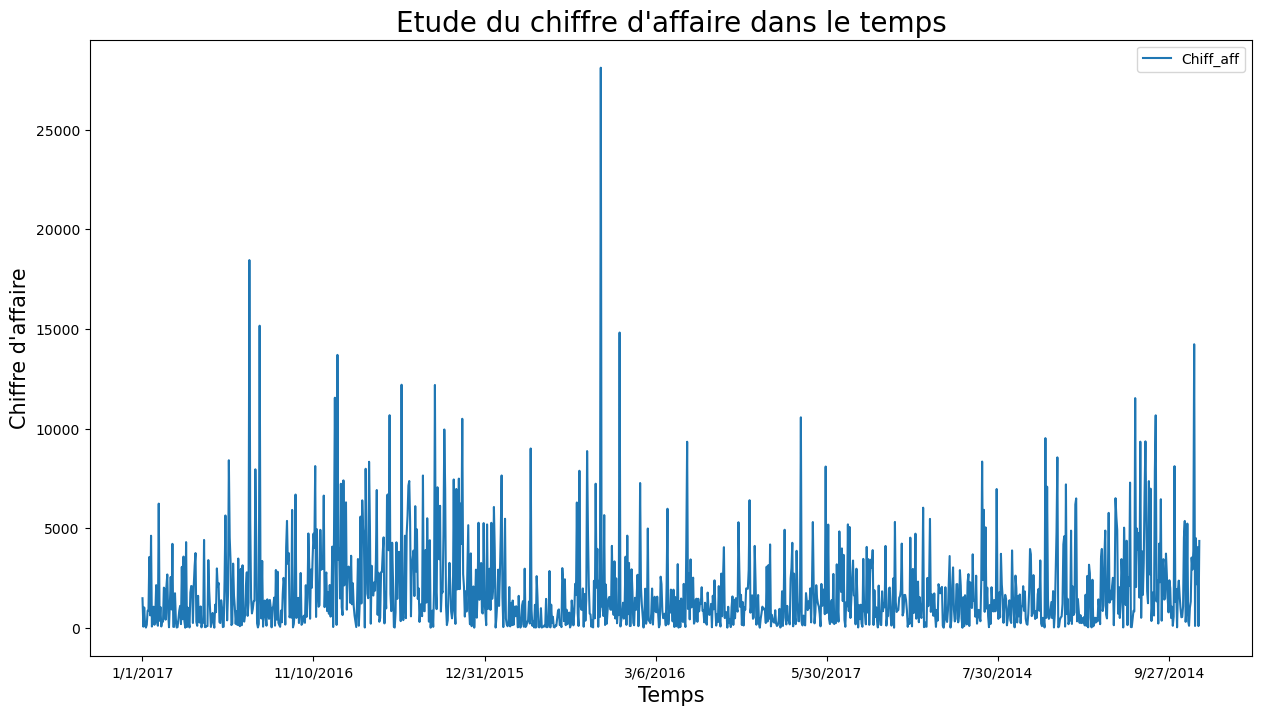

In [17]:
Chiff_aff_temps.plot.line(y='Chiff_aff', x = 'Order Date',figsize=(15, 8))
plt.title("Etude du chiffre d'affaire dans le temps", size = 20)
plt.ylabel("Chiffre d'affaire", fontsize= 15)
plt.xlabel("Temps", fontsize= 15)
plt.show()

# Analyse Exploratoire des Données(EDA).

### 1- Analyse de la répartition des produits  et des quantités vendus par catégorie

In [18]:
# Nombre total de produit vendu
NbProdVendu = df['Product ID'].nunique()
print("Durant la période étudier", NbProdVendu,"produits différent ont été vendu !")

Durant la période étudier 1862 produits différent ont été vendu !


In [19]:
# Couleurs pour le camembert
colors = ['red', 'blue', 'green']

In [20]:
NbrProdCateg = df.groupby('Category')['Product ID'].nunique()
NbrProdCateg

Category
Furniture           375
Office Supplies    1083
Technology          404
Name: Product ID, dtype: int64

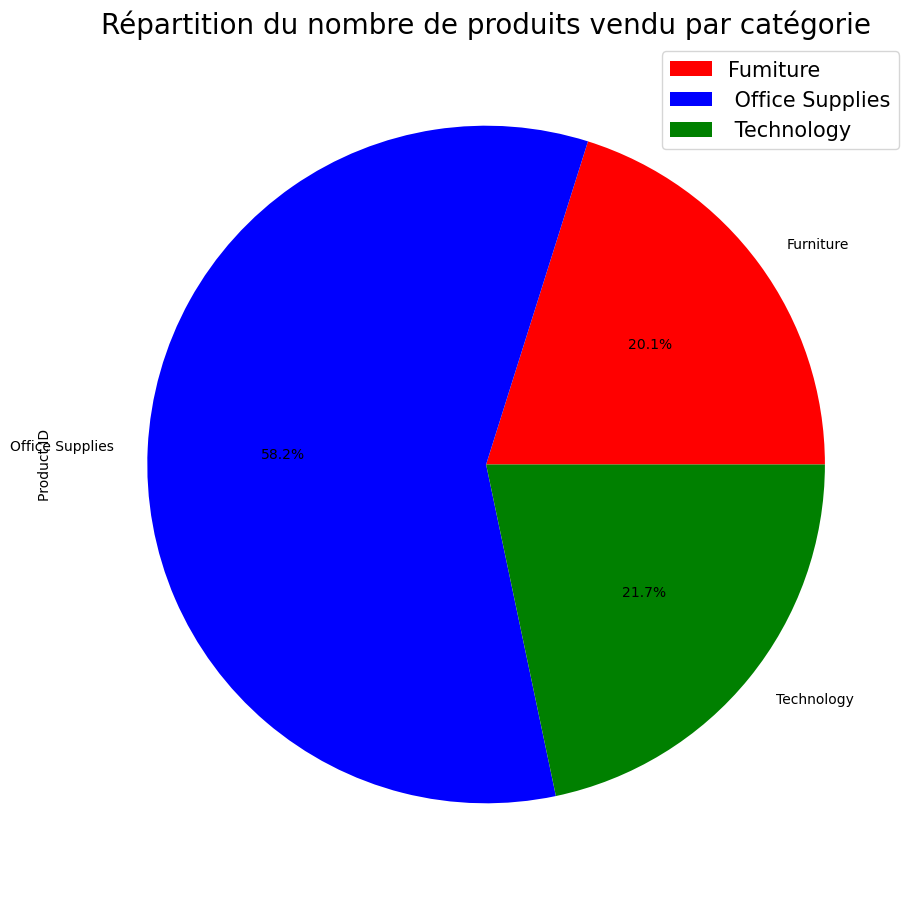

In [21]:
# Répartition des produits par catégorie !

NbrProdCateg = df.groupby('Category')['Product ID'].nunique()
NbrProdCateg.plot.pie(colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Fumiture',' Office Supplies',' Technology'], fontsize = 15)
plt.show()

Sur les 1862 produits différents vendus:
- Plus de la moitié  des produits vendu font parti de la catégorie **Office Supplies**, avec plus de 58,2% (1083 produits différents)  produits différents vendus !

- La catégorie **Technology** quant à elle, contient 21.7% (404 produits différents)des différents produits vendus 

- Et pour terminé, 20.1% (375 produits différents)des différents produits vendus appartiennent à la catégorie **Fumiture**.

In [22]:
QteProdVendu = df['Quantity'].sum()
print("Durant la période étudier, la quantité de produits vendu est de", QteProdVendu,"produits vendu !")

Durant la période étudier, la quantité de produits vendu est de 37873 produits vendu !


In [23]:
QteProdCateg = df.groupby('Category')['Quantity'].sum()
QteProdCateg

Category
Furniture           8028
Office Supplies    22906
Technology          6939
Name: Quantity, dtype: int64

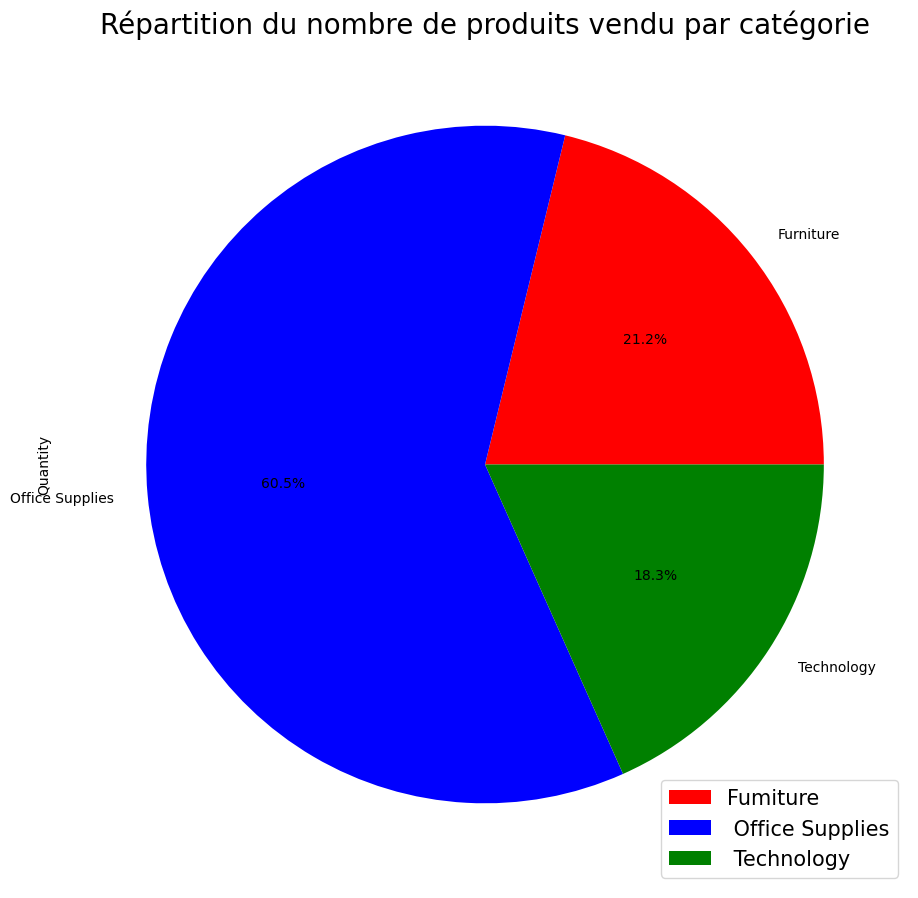

In [24]:
# Quantité de produits vendus
QteProdCateg = df.groupby('Category')['Quantity'].sum()
QteProdCateg.plot.pie(colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Fumiture',' Office Supplies',' Technology'], fontsize = 15)
plt.show()

Sur les 37873 produits vendus:
- La majorité  des produits vendus font partir de la catégorie **Office Supplies**, avec plus de 60.5% (ou 22906)  produits différents vendus !

- La catégorie **Furniture** quant à elle, contient 21.2% (ou 8028)des produits vendus 

- Et pour terminé, 18.3% (ou 6939)des produits vendus appartiennent à la catégorie **Fumiture**.

#### Synthèse 

D'après les deux analyses précédentes, plus la catégorie regroupe plusieurs produits différents, plus sa quantité de produits vendus est grande. 

### 2- Analyse du chiffre d'affaire par catégorie de produits.

In [25]:
# Calcul du chiffre d'affaire par catégorie
Chiff_aff_categ = df.groupby('Category')['Sales'].sum()
Chiff_aff_categ= round(df.groupby('Category')['Sales'].sum())
#Chiff_aff_categ=Chiff_aff_categ.rename(columns={'Sales':"Chiffre d'affaire"})
Chiff_aff_categ

Category
Furniture          742000.0
Office Supplies    719047.0
Technology         836154.0
Name: Sales, dtype: float64

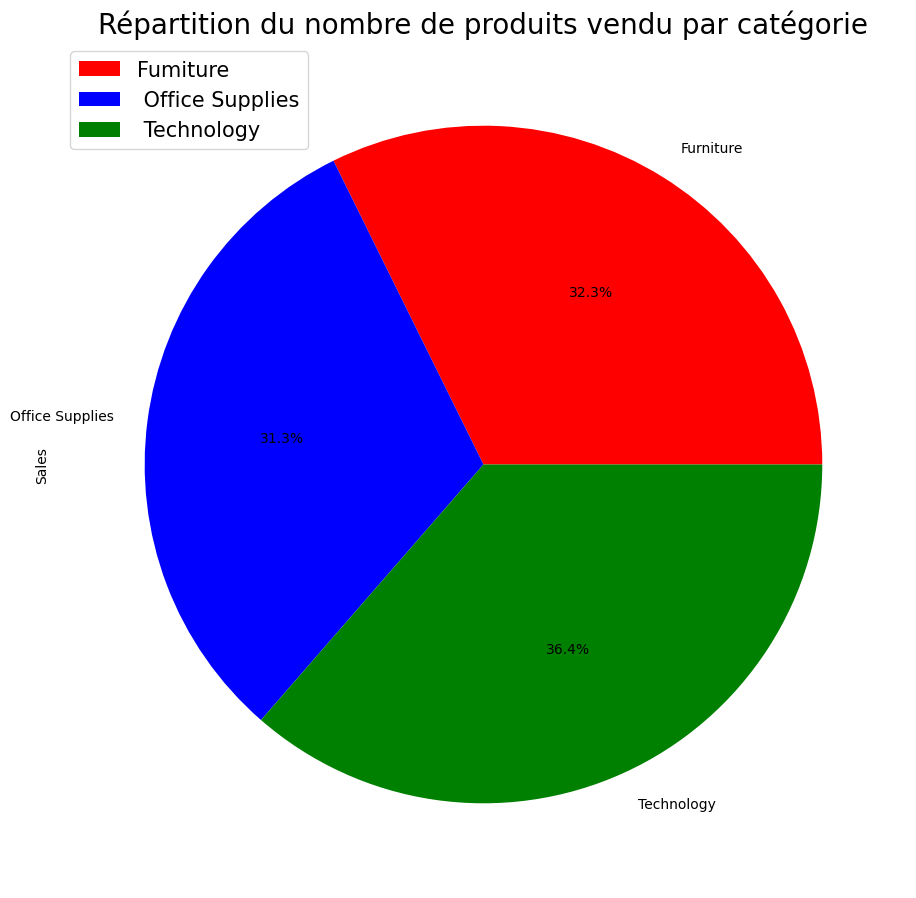

In [26]:
# Repartition du chiffre d'affaire par catégorie
Chiff_aff_categ.plot.pie(colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du nombre de produits vendu par catégorie", size = 20)
plt.legend(['Fumiture',' Office Supplies',' Technology'], fontsize = 15)
plt.show()

**Top 1**
- La catégorie **Technology**  avec un chiffre d'affaire de plus de 836154.0€

**Top 2**
- La catégorie **Furniture** avec un chiffre d'affaire proche de 742000.0€

**Top 3**
- La catégorie **Office Supplies** avec un chiffre d'affaire  légèrement infèrieur à celui de La catégorie **Furniture** avec 719047.0€

In [28]:
# Calcul du chiffre d'affaire moyen par catégorie

Moy_Chiff_aff_categ = df.groupby(by=['Category'])
Moy_Chiff_aff_categ = Moy_Chiff_aff_categ[['Sales']].mean().reset_index()
round(Moy_Chiff_aff_categ)

,Category,Sales
0,Furniture,350.0
1,Office Supplies,119.0
2,Technology,453.0


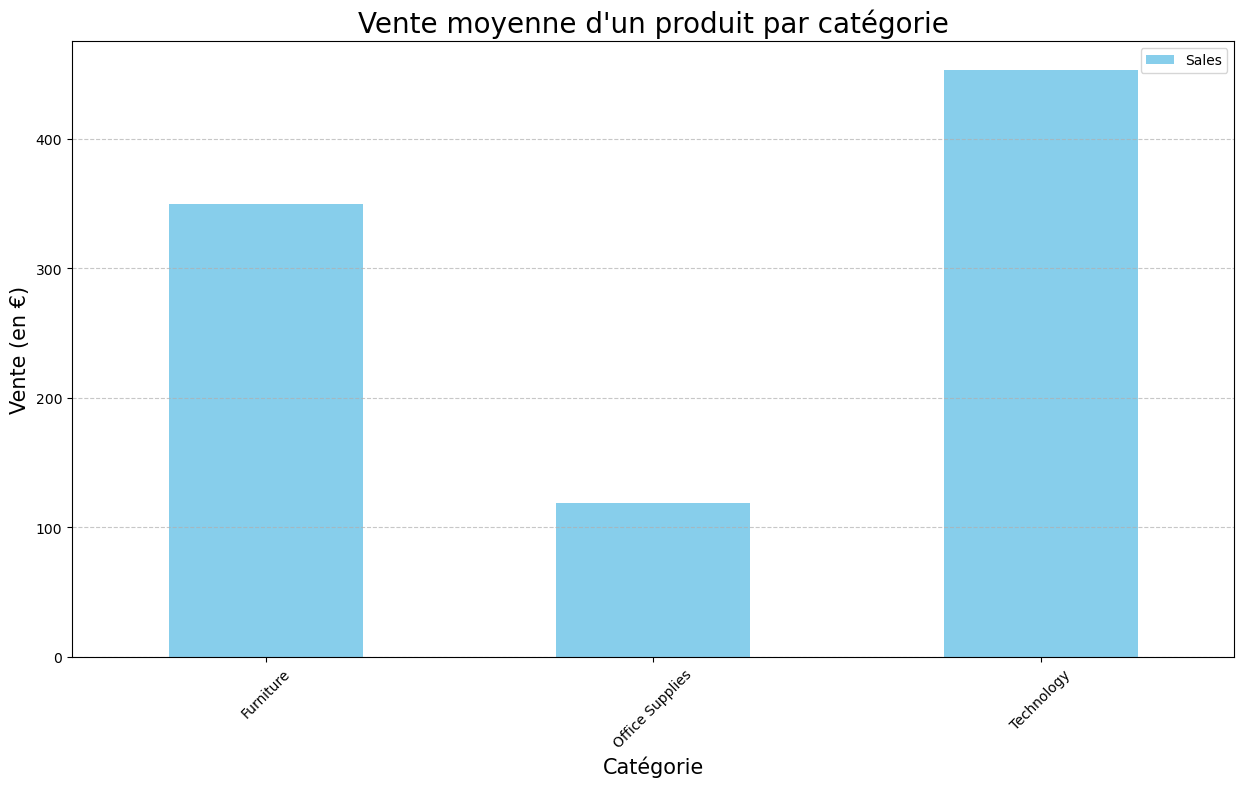

In [29]:
# Visualisation des ventes moyennes par Catégorie
round(Moy_Chiff_aff_categ).plot.bar(x='Category', y='Sales', figsize=(15, 8), color='skyblue')
plt.title("Vente moyenne d'un produit par catégorie", size=20)
plt.ylabel("Vente (en €)", size=15)
plt.xlabel("Catégorie", size=15)
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille pour mieux lire les valeurs
plt.show()

**Nous avons le meme classement que dans l'analyse de chiffre d'affaire total :**

- Catégorie Furniture : 350.0€
- Catégorie Office Supplies : 119.0€
- Catégorie Technologie: 453.0€

**En comparant la répartition des vente par catégorie ainsi que le prix moyen par catégorie, on peut constater que moins le prix moyen est élever plus les produits sont vendu !**

## 3- Analyse des intéraction entre les Catégories de produits.

In [30]:
# Création d'une matrice de présence des produits dans les paniers
Parniers = df.groupby(['Order ID', 'Category'])['Quantity'].sum().unstack().fillna(0)
Parniers

Category,Furniture,Office Supplies,Technology
Order ID,,,
CA-2014-100006,0.0,0.0,3.0
CA-2014-100090,3.0,6.0,0.0
CA-2014-100293,0.0,6.0,0.0
CA-2014-100328,0.0,1.0,0.0
CA-2014-100363,0.0,5.0,0.0
...,...,...,...
US-2017-168802,0.0,4.0,0.0
US-2017-169320,0.0,2.0,5.0
US-2017-169488,0.0,7.0,0.0


In [31]:
# Relation entre les différentes carégorie quanti/quanti(Matrice de corrélation)
Parniers.corr()

Category,Furniture,Office Supplies,Technology
Category,,,
Furniture,1.000000,-0.014278,0.006645
Office Supplies,-0.014278,1.000000,0.017872
Technology,0.006645,0.017872,1.000000


<AxesSubplot:xlabel='Category', ylabel='Category'>

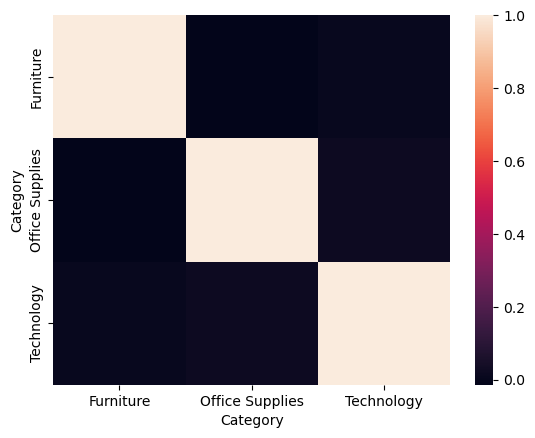

In [32]:
# Carte de corrélation
sns.heatmap(Parniers.corr())

**Synthèse de la matrice de corrélation :**
    

Aucune corrélation significative n'a été détectée entre les trois catégories (Furniture, Office Supplies, Technology). Les valeurs de corrélation sont toutes très proches de 0, ce qui suggère que les performances des ventes de ces catégories sont indépendantes les unes des autres.

Cela pourrait signifier que les facteurs influençant les ventes de meubles(Furniture), de fournitures de bureau(Office Supplies) et de produits technologiques(Technology) sont différents et ne se chevauchent pas.


In [ ]:
# Création d'une matrice de présence des produits dans les paniers
Parniers = Parniers.applymap(lambda x: 1 if x > 0 else 0)
# Extraction des règles d'association
frequent_itemsets = apriori(Parniers, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules)

## Synthèse des résultats de l'analyse

- (Office Supplies, Furniture) → (Technology)
 Interprétation :

Si un client achète Fournitures de bureau & Mobilier, alors il a 33,4 % de chances d’acheter aussi Technologie.
Lift = 1.08 : Légère corrélation positive, mais pas très forte.
Jaccard = 0.148 : Faible chevauchement entre les transactions contenant (Office Supplies, Furniture) et celles contenant Technology.
Conclusion : Cette relation existe mais reste faible en termes de force d'association

-(Office Supplies, Technology) → (Furniture)
Interprétation :

Si un client achète Fournitures de bureau & Technologie, alors il achète aussi Mobilier dans 35,4 % des cas.
Lift = 1.006 : Quasi-indépendance → la probabilité d'acheter Furniture ne change presque pas si on achète (Office Supplies, Technology).
Conviction = 1.003 : Faible fiabilité de la règle.
**Conclusion** : La relation est très faible, il n’y a pas d’indication forte de complémentarité entre ces catégories.

- (Furniture) → (Office Supplies, Technology)
 Interprétation :

Si un client achète du Mobilier, alors il achète aussi Fournitures de bureau & Technologie dans 18,3 % des cas.
Lift = 1.006 : Relation quasi-nulle (aucune influence significative).
** Conclusion** : Le mobilier est souvent acheté seul, cette règle n’est pas pertinente pour expliquer une forte interaction.

- (Technology) → (Office Supplies, Furniture)
Interprétation :

Si un client achète de la Technologie, il achète aussi Fournitures de bureau & Mobilier dans 20,9 % des cas.
Lift = 1.08 : Relation légèrement positive.
Zhang’s Metric = 0.112 : Indique une faible dépendance entre ces catégories.
**Conclusion** : Une faible complémentarité entre Technologie et le combo (Fournitures de bureau & Mobilier).

** Conclusion générale**
-Pas de forte relation entre les catégories. Les lifts sont proches de 1.0, indiquant une quasi-indépendance des achats.
- La règle la plus pertinente est (Office Supplies, Furniture) → Technology avec 33 % de confiance, mais son lift reste faible (1.08).
- Mobilier semble être une catégorie achetée seule, avec peu d’interactions significatives avec d’autres catégories.



## Synthèse des résultats

Pour l'entreprise, cela implique que les stratégies marketing, les promotions ou les efforts de vente pour une catégorie n'auront probablement pas d'impact direct sur les autres catégories.



# Analyse des Performances Régionales

## 1- Analyse du chiffre d'affaires par région

In [ ]:
Chiff_aff_reg=round(df.groupby(['Region'])['Sales'].sum().reset_index())
Chiff_aff_reg= Chiff_aff_reg.rename(columns={'Sales':"Chiffre d'affaire"})
Chiff_aff_reg

In [ ]:
colors = sns.color_palette("muted")
Chiff_aff_reg.plot.pie(y = "Chiffre d'affaire", colors = colors, figsize=(11, 11), autopct = "%1.1f%%")
plt.title("Répartition du chiffre d'affaire par catégorie", size = 10)
plt.legend(['Central','East','South','West'], fontsize = 15)
plt.show()

**Top 1**
- La région **West**  avec un chiffre d'affaire de plus de 31.6% soit un total de 725458.0€

**Top 2**
- La région **East** avec un chiffre d'affaire proche 29.5% soit un total dde 678781.0€

**Top 3**
- La région **Central** avec un chiffre d'affaire de 21.8% soit un total de 501240.0€

**Top 4**
- La région **South** avec un chiffre d'affaire de 17.1% soit un total de 391722.0€

In [ ]:
## 2- 